# 0.引入所需模組與必要的資料集

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

In [3]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')
test_data = pd.read_csv('../../data/kaggle_titanic/test.csv')
train_data = pd.read_csv('../../data/kaggle_titanic/train.csv')

# 1.查看資料

In [4]:
def DatasetsInfo(train_data,test_data):
    train_data.info()
    print("-" * 40)
    test_data.info()
DatasetsInfo(train_data,test_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [9]:
print(train_data.describe())
print("-" * 40)
print(train_data.describe(include=['O']))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
----------------------------------------
                                        

In [15]:
print(test_data.describe())
print("-" * 40)
print(test_data.describe(include=['O']))

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
----------------------------------------
                            Name   Sex    Ticket            Cabin Embarked
count                        418   418       418               91      418
unique                       418     2       363               76        3
top     Midtsjo, Mr. Ka

In [12]:
def DatasetMissingPercentage(data):
    return pd.DataFrame({'DataMissingPercentage':data.isnull().sum() * 100 / len(train_data)})

DatasetMissingPercentage(train_data)

,DataMissingPercentage
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [13]:
DatasetMissingPercentage(test_data)

,DataMissingPercentage
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,9.652076
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.112233
Cabin,36.700337


In [11]:
def DatasetUniquePercentage(data):
    return pd.DataFrame({'percent_unique':data.apply(lambda x: x.unique().size/x.size*100)})

DatasetUniquePercentage(train_data)

,percent_unique
PassengerId,100.000000
Survived,0.224467
Pclass,0.336700
Name,100.000000
Sex,0.224467
Age,9.988777
SibSp,0.785634
Parch,0.785634
Ticket,76.430976
Fare,27.833895


In [14]:
DatasetUniquePercentage(test_data)

,percent_unique
PassengerId,100.000000
Pclass,0.717703
Name,100.000000
Sex,0.478469
Age,19.138756
SibSp,1.674641
Parch,1.913876
Ticket,86.842105
Fare,40.669856
Cabin,18.421053


# 2.分析資料

## 基礎分析

In [16]:
print('Id is unique.') if train_data.PassengerId.nunique() == train_data.shape[0] else print('oops')
print('Train and test sets are distinct.') if len(np.intersect1d(train_data.PassengerId.values, test_data.PassengerId.values))== 0 else print('oops')#0表示train,test dataset資料一致
#查看資料是否有nan並設置datasetHasNan flag   
if train_data.count().min() == train_data.shape[0] and test_dataset.count().min() == test_dataset.shape[0] :
    print('We do not need to worry about missing values.') 
else:
    nas = pd.concat([train_data.isnull().sum(), test_data.isnull().sum()], axis=1, keys=['Train Dataset', 'Test Dataset']) 
    print('Nan in the data sets')
    print(nas[nas.sum(axis=1) > 0])


Id is unique.
Train and test sets are distinct.
Nan in the data sets
          Train Dataset  Test Dataset
Age                 177          86.0
Cabin               687         327.0
Embarked              2           0.0
Fare                  0           1.0


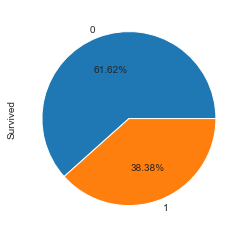

In [5]:
#存活率 
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

## 相關性分析

In [24]:
# Sex vs Survived
print(train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Class vs Survived，存活率高到低，P1,P2,P3  
print(train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Sex and Class vs Survived
print(train_data[['Sex', 'Pclass', 'Survived']].groupby(['Sex', 'Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# SibSp vs Survived
print(train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Parch vs Survived
print(train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Family vs Survived
train_data['Family'] = train_data['SibSp'] + train_data['Parch']
print(train_data[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Embark vs Survived
print(train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()

      Sex  Survived
0  female  0.742038
1    male  0.188908

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

      Sex  Pclass  Survived
0  female       1  0.968085
1  female       2  0.921053
2  female       3  0.500000
3    male       1  0.368852
4    male       2  0.157407
5    male       3  0.135447

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

   Family  Survived
3       3  0.724138
2       2  0.578431
1       1  0.552795
6       6  0.333333
0       0  0.303538
4       4  0.200000
5       5  0.136364
7       7  0.000000
8      10  0.000000

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957



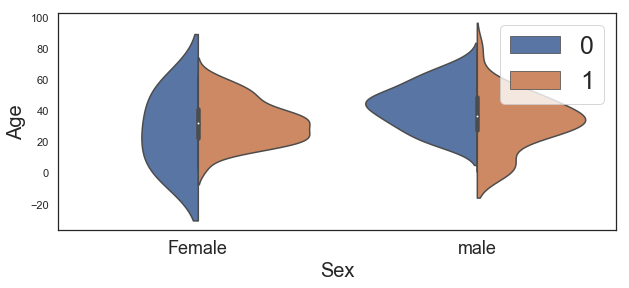

In [22]:
#年齡跟生存率關係  
ax = plt.figure(figsize=(10,4)).add_subplot(111)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_data.dropna(), split=True)
ax.set_xlabel('Sex',size=20)
ax.set_xticklabels(['Female','male'], size=18)
ax.set_ylabel('Age',size=20)
ax.legend(fontsize=25,loc='best')

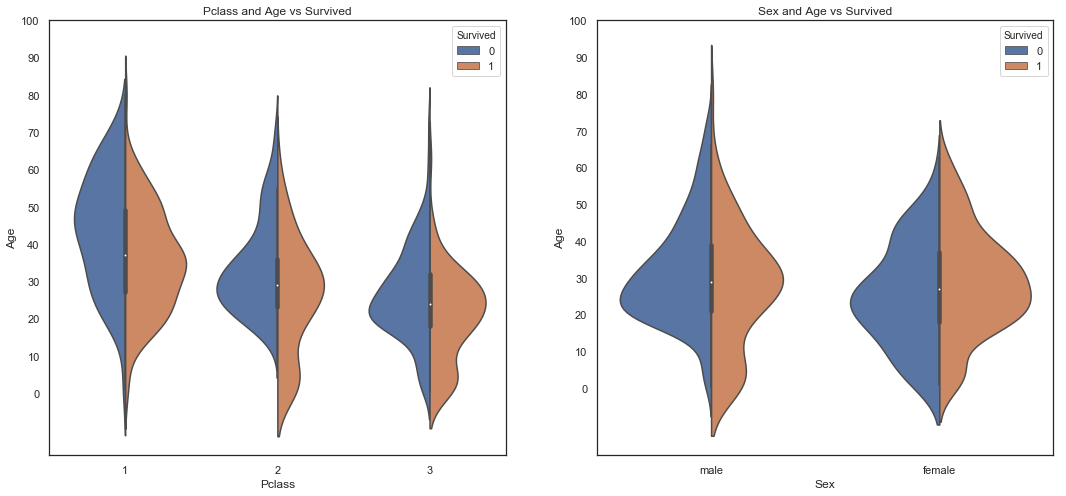

In [23]:
#階級跟年齡對生存率，性別跟年齡對生存率
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Train Features


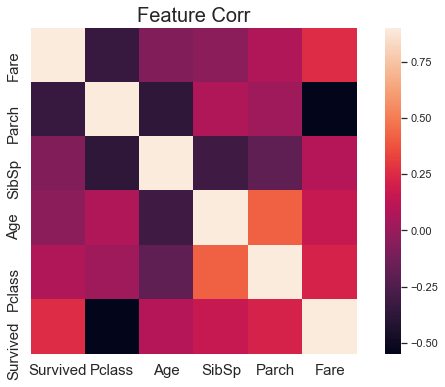

In [17]:
def FeatureCorreate(datasets,dropData):
    sns.set(context="paper", font="monospace")
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(10,6))
    train_corr = datasets.drop(dropData,axis=1).corr()
    sns.heatmap(train_corr, ax=ax, vmax=.9, square=True)
    ax.set_xticklabels(train_corr.index, size=15)
    ax.set_yticklabels(train_corr.columns[::-1], size=15)
    ax.set_title('Feature Corr', fontsize=20)
print("Train Features")
FeatureCorreate(train_data,'PassengerId')

# 3.特徵工程

## 合併測試與訓練集一起處理 

In [4]:
test_data['Survived']=0#test set沒有Survived
combined_train_test = train_data.append(test_data)

In [5]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


## 先處理缺失值少的 embarked,fare

In [6]:
#缺失值少的Embarked用眾數mode填充 
if combined_train_test['Embarked'].isnull().sum() != 0:
    combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0], inplace=True)
#dummy values:將各類別轉成01數值    
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'],prefix=combined_train_test[['Embarked']].columns[0])
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)

In [7]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
Embarked_C     1309 non-null uint8
Embarked_Q     1309 non-null uint8
Embarked_S     1309 non-null uint8
dtypes: float64(2), int64(5), object(5), uint8(3)
memory usage: 136.8+ KB


In [8]:
combined_train_test['Embarked_C'].head()

0    0
1    1
2    0
3    0
4    0
Name: Embarked_C, dtype: uint8

In [9]:
if combined_train_test['Fare'].isnull().sum() != 0:
    combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform('mean'))

In [10]:
#團體票
combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')
combined_train_test['Fare'] = combined_train_test['Fare'] / combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'], axis=1, inplace=True)

In [11]:
#票價分級
def fare_category(fare):
        if fare <= 4:
            return 0
        elif fare <= 10:
            return 1
        elif fare <= 30:
            return 2
        elif fare <= 45:
            return 3
        else:
            return 4
combined_train_test['Fare_Category'] = combined_train_test['Fare'].map(fare_category)

In [12]:
fare_cat_dummies_df = pd.get_dummies(combined_train_test['Fare_Category'],prefix=combined_train_test[['Fare_Category']].columns[0])
combined_train_test = pd.concat([combined_train_test, fare_cat_dummies_df], axis=1)

In [13]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 21 columns):
Age                1046 non-null float64
Cabin              295 non-null object
Embarked           1309 non-null object
Fare               1309 non-null float64
Name               1309 non-null object
Parch              1309 non-null int64
PassengerId        1309 non-null int64
Pclass             1309 non-null int64
Sex                1309 non-null object
SibSp              1309 non-null int64
Survived           1309 non-null int64
Ticket             1309 non-null object
Embarked_C         1309 non-null uint8
Embarked_Q         1309 non-null uint8
Embarked_S         1309 non-null uint8
Fare_Category      1309 non-null int64
Fare_Category_0    1309 non-null uint8
Fare_Category_1    1309 non-null uint8
Fare_Category_2    1309 non-null uint8
Fare_Category_3    1309 non-null uint8
Fare_Category_4    1309 non-null uint8
dtypes: float64(2), int64(6), object(5), uint8(8)
memory usage: 193

## 處理無缺失值的 sex,title,pclass   

In [14]:
sex_dummies_df = pd.get_dummies(combined_train_test['Sex'], prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test, sex_dummies_df], axis=1)

In [15]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 23 columns):
Age                1046 non-null float64
Cabin              295 non-null object
Embarked           1309 non-null object
Fare               1309 non-null float64
Name               1309 non-null object
Parch              1309 non-null int64
PassengerId        1309 non-null int64
Pclass             1309 non-null int64
Sex                1309 non-null object
SibSp              1309 non-null int64
Survived           1309 non-null int64
Ticket             1309 non-null object
Embarked_C         1309 non-null uint8
Embarked_Q         1309 non-null uint8
Embarked_S         1309 non-null uint8
Fare_Category      1309 non-null int64
Fare_Category_0    1309 non-null uint8
Fare_Category_1    1309 non-null uint8
Fare_Category_2    1309 non-null uint8
Fare_Category_3    1309 non-null uint8
Fare_Category_4    1309 non-null uint8
Sex_female         1309 non-null uint8
Sex_male           1309 non-

In [16]:
#從名稱獨立出title  
combined_train_test['Title'] = combined_train_test['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
combined_train_test['Title'] = combined_train_test['Title'].map(title_Dict)
#title也one-hot
combined_train_test['Title'] = pd.factorize(combined_train_test['Title'])[0]
title_dummies_df = pd.get_dummies(combined_train_test['Title'], prefix=combined_train_test[['Title']].columns[0])
combined_train_test = pd.concat([combined_train_test, title_dummies_df], axis=1)

In [17]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 30 columns):
Age                1046 non-null float64
Cabin              295 non-null object
Embarked           1309 non-null object
Fare               1309 non-null float64
Name               1309 non-null object
Parch              1309 non-null int64
PassengerId        1309 non-null int64
Pclass             1309 non-null int64
Sex                1309 non-null object
SibSp              1309 non-null int64
Survived           1309 non-null int64
Ticket             1309 non-null object
Embarked_C         1309 non-null uint8
Embarked_Q         1309 non-null uint8
Embarked_S         1309 non-null uint8
Fare_Category      1309 non-null int64
Fare_Category_0    1309 non-null uint8
Fare_Category_1    1309 non-null uint8
Fare_Category_2    1309 non-null uint8
Fare_Category_3    1309 non-null uint8
Fare_Category_4    1309 non-null uint8
Sex_female         1309 non-null uint8
Sex_male           1309 non-

In [18]:
#Pclass
from sklearn.preprocessing import LabelEncoder

# 建立PClass Fare Category
def pclass_fare_category(df, pclass1_mean_fare, pclass2_mean_fare, pclass3_mean_fare):
    if df['Pclass'] == 1:
        if df['Fare'] <= pclass1_mean_fare:
            return 'Pclass1_Low'
        else:
            return 'Pclass1_High'
    elif df['Pclass'] == 2:
        if df['Fare'] <= pclass2_mean_fare:
            return 'Pclass2_Low'
        else:
            return 'Pclass2_High'
    elif df['Pclass'] == 3:
        if df['Fare'] <= pclass3_mean_fare:
            return 'Pclass3_Low'
        else:
            return 'Pclass3_High'

Pclass1_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([1]).values[0]
Pclass2_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([2]).values[0]
Pclass3_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([3]).values[0]

# 建立Pclass_Fare Category
combined_train_test['Pclass_Fare_Category'] = combined_train_test.apply(pclass_fare_category, args=(
 Pclass1_mean_fare, Pclass2_mean_fare, Pclass3_mean_fare), axis=1)
pclass_level = LabelEncoder()

# 给每一项添加标签
pclass_level.fit(np.array(
 ['Pclass1_Low', 'Pclass1_High', 'Pclass2_Low', 'Pclass2_High', 'Pclass3_Low', 'Pclass3_High']))

# 转换成数值
combined_train_test['Pclass_Fare_Category'] = pclass_level.transform(combined_train_test['Pclass_Fare_Category'])

# dummy 转换
pclass_dummies_df = pd.get_dummies(combined_train_test['Pclass_Fare_Category']).rename(columns=lambda x: 'Pclass_' + str(x))
combined_train_test = pd.concat([combined_train_test, pclass_dummies_df], axis=1)

combined_train_test['Pclass'] = pd.factorize(combined_train_test['Pclass'])[0]


In [19]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 37 columns):
Age                     1046 non-null float64
Cabin                   295 non-null object
Embarked                1309 non-null object
Fare                    1309 non-null float64
Name                    1309 non-null object
Parch                   1309 non-null int64
PassengerId             1309 non-null int64
Pclass                  1309 non-null int64
Sex                     1309 non-null object
SibSp                   1309 non-null int64
Survived                1309 non-null int64
Ticket                  1309 non-null object
Embarked_C              1309 non-null uint8
Embarked_Q              1309 non-null uint8
Embarked_S              1309 non-null uint8
Fare_Category           1309 non-null int64
Fare_Category_0         1309 non-null uint8
Fare_Category_1         1309 non-null uint8
Fare_Category_2         1309 non-null uint8
Fare_Category_3         1309 non-null uint8
Fare_C

## Parch跟SibSp合併Family_Size

In [20]:
#合併處理Parch and SibSp
def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <= 4:
        return 'Small_Family'
    else:
        return 'Large_Family'

combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1
combined_train_test['Family_Size_Category'] = combined_train_test['Family_Size'].map(family_size_category)

le_family = LabelEncoder()
le_family.fit(np.array(['Single', 'Small_Family', 'Large_Family']))
combined_train_test['Family_Size_Category'] = le_family.transform(combined_train_test['Family_Size_Category'])

family_size_dummies_df = pd.get_dummies(combined_train_test['Family_Size_Category'],prefix=combined_train_test[['Family_Size_Category']].columns[0])
combined_train_test = pd.concat([combined_train_test, family_size_dummies_df], axis=1)

In [22]:
#sex因為不是數值，丟進模型前要one-hot(dummy)
combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]

sex_dummies_df = pd.get_dummies(combined_train_test['Sex'], prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test, sex_dummies_df], axis=1)

In [23]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 44 columns):
Age                       1046 non-null float64
Cabin                     295 non-null object
Embarked                  1309 non-null object
Fare                      1309 non-null float64
Name                      1309 non-null object
Parch                     1309 non-null int64
PassengerId               1309 non-null int64
Pclass                    1309 non-null int64
Sex                       1309 non-null int64
SibSp                     1309 non-null int64
Survived                  1309 non-null int64
Ticket                    1309 non-null object
Embarked_C                1309 non-null uint8
Embarked_Q                1309 non-null uint8
Embarked_S                1309 non-null uint8
Fare_Category             1309 non-null int64
Fare_Category_0           1309 non-null uint8
Fare_Category_1           1309 non-null uint8
Fare_Category_2           1309 non-null uint8
Fare_Category

## 缺失值多的不能直接眾數或平均數，有兩種填充法 age  
1.依title平均年齡填充  
2.利用機器學習算法對其他特徵預測，多模型融合預測 age(採用） 

In [24]:
#欄位都要是數值
missing_age_df = pd.DataFrame(combined_train_test[['Age','Embarked_C','Embarked_Q','Embarked_S', 'Sex', 'Title', 'Family_Size', 'Family_Size_Category','Pclass_Fare_Category']])
#依照age有無區分為訓練與測試集
missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]

In [27]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(missing_age_train, missing_age_test):
    missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
    missing_age_Y_train = missing_age_train['Age']
    missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

    # model 1  gbm
    gbm_reg = GradientBoostingRegressor(random_state=42)
    gbm_reg_param_grid = {'n_estimators': [2000], 'max_depth': [4], 'learning_rate': [0.01], 'max_features': [3]}
    gbm_reg_grid = model_selection.GridSearchCV(gbm_reg, gbm_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    gbm_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best GB Params:' + str(gbm_reg_grid.best_params_))
    print('Age feature Best GB Score:' + str(gbm_reg_grid.best_score_))
    print('GB Train Error for "Age" Feature Regressor:' + str(gbm_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_GB'] = gbm_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_GB'][:4])
    
    # model 2 rf
    rf_reg = RandomForestRegressor()
    rf_reg_param_grid = {'n_estimators': [200], 'max_depth': [5], 'random_state': [0]}
    rf_reg_grid = model_selection.GridSearchCV(rf_reg, rf_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    rf_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best RF Params:' + str(rf_reg_grid.best_params_))
    print('Age feature Best RF Score:' + str(rf_reg_grid.best_score_))
    print('RF Train Error for "Age" Feature Regressor' + str(rf_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_RF'] = rf_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_RF'][:4])

    # two models merge
    print('shape1', missing_age_test['Age'].shape, missing_age_test[['Age_GB', 'Age_RF']].mode(axis=1).shape)
    # missing_age_test['Age'] = missing_age_test[['Age_GB', 'Age_LR']].mode(axis=1)

    missing_age_test.loc[:, 'Age'] = np.mean([missing_age_test['Age_GB'], missing_age_test['Age_RF']])
    print(missing_age_test['Age'][:4])

    missing_age_test.drop(['Age_GB', 'Age_RF'], axis=1, inplace=True)

    return missing_age_test

In [28]:
combined_train_test.loc[(combined_train_test.Age.isnull()), 'Age'] = fill_missing_age(missing_age_train, missing_age_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    2.0s remaining:    2.0s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:   43.7s finished
/Users/yumei/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Age feature Best GB Params:{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}
Age feature Best GB Score:-122.59484813209025
GB Train Error for "Age" Feature Regressor:-96.64999132127174
5     34.268116
17    32.491692
19    32.441639
26    26.354323
Name: Age_GB, dtype: float64
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:   13.4s finished
/Users/yumei/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Age feature Best RF Params:{'max_depth': 5, 'n_estimators': 200, 'random_state': 0}
Age feature Best RF Score:-116.16544314788861
RF Train Error for "Age" Feature Regressor-102.20236641505362
5     32.815656
17    33.130105
19    32.576342
26    27.479237
Name: Age_RF, dtype: float64
shape1 (263,) (263, 2)
5     29.208651
17    29.208651
19    29.208651
26    29.208651
Name: Age, dtype: float64


In [29]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 44 columns):
Age                       1309 non-null float64
Cabin                     295 non-null object
Embarked                  1309 non-null object
Fare                      1309 non-null float64
Name                      1309 non-null object
Parch                     1309 non-null int64
PassengerId               1309 non-null int64
Pclass                    1309 non-null int64
Sex                       1309 non-null int64
SibSp                     1309 non-null int64
Survived                  1309 non-null int64
Ticket                    1309 non-null object
Embarked_C                1309 non-null uint8
Embarked_Q                1309 non-null uint8
Embarked_S                1309 non-null uint8
Fare_Category             1309 non-null int64
Fare_Category_0           1309 non-null uint8
Fare_Category_1           1309 non-null uint8
Fare_Category_2           1309 non-null uint8
Fare_Category

## 如果缺失值太多，將有沒有值當特徵 cabin  

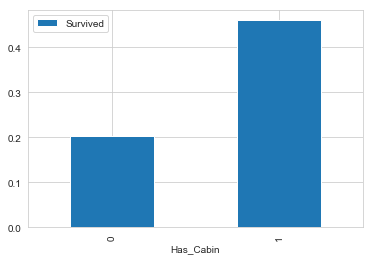

In [33]:
combined_train_test.loc[combined_train_test.Cabin.isnull(), 'Cabin'] = 'X'
combined_train_test['Has_Cabin'] = combined_train_test['Cabin'].apply(lambda x: 0 if x == 'X' else 1)
combined_train_test[['Has_Cabin','Survived']].groupby(['Has_Cabin']).mean().plot.bar()

In [34]:
combined_train_test['Cabin'] = combined_train_test.Cabin.fillna('X')

In [41]:
#刪除不必要特徵cabin,embarked->c,q,s,name,ticket->
del combined_train_test['Cabin']
del combined_train_test['Embarked']
del combined_train_test['Name']
del combined_train_test['Ticket']

In [42]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 41 columns):
Age                       1309 non-null float64
Fare                      1309 non-null float64
Parch                     1309 non-null int64
PassengerId               1309 non-null int64
Pclass                    1309 non-null int64
Sex                       1309 non-null int64
SibSp                     1309 non-null int64
Survived                  1309 non-null int64
Embarked_C                1309 non-null uint8
Embarked_Q                1309 non-null uint8
Embarked_S                1309 non-null uint8
Fare_Category             1309 non-null int64
Fare_Category_0           1309 non-null uint8
Fare_Category_1           1309 non-null uint8
Fare_Category_2           1309 non-null uint8
Fare_Category_3           1309 non-null uint8
Fare_Category_4           1309 non-null uint8
Sex_female                1309 non-null uint8
Sex_male                  1309 non-null uint8
Title           

# 4.建模,訓練,預測

In [43]:
#切測試訓練集
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]
#準備預測Survived
titanic_train_data_X = train_data.drop(['Survived'],axis=1)
titanic_train_data_Y = train_data['Survived']
titanic_test_data_X = test_data.drop(['Survived'],axis=1)

In [37]:
#找重要特徵
def get_top_n_features(titanic_train_data_X, titanic_train_data_Y, top_n_features):
    # 随机森林
    rf_est = RandomForestClassifier(random_state=42)
    rf_param_grid = {'n_estimators': [500], 'min_samples_split': [2, 3], 'max_depth': [20]}
    rf_grid = model_selection.GridSearchCV(rf_est, rf_param_grid, n_jobs=25, cv=10, verbose=1)
    rf_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    #将feature按Importance排序
    feature_imp_sorted_rf = pd.DataFrame({'feature': list(titanic_train_data_X), 'importance': rf_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print('Sample 25 Features from RF Classifier')
    print(str(features_top_n_rf[:25]))
    
    # AdaBoost
    ada_est = ensemble.AdaBoostClassifier(random_state=42)
    ada_param_grid = {'n_estimators': [500], 'learning_rate': [0.5, 0.6]}
    ada_grid = model_selection.GridSearchCV(ada_est, ada_param_grid, n_jobs=25, cv=10, verbose=1)
    ada_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    #排序
    feature_imp_sorted_ada = pd.DataFrame({'feature': list(titanic_train_data_X),'importance': ada_grid.best_estimator_.feature_importances_}).sort_values( 'importance', ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    
    # ExtraTree
    et_est = ensemble.ExtraTreesClassifier(random_state=42)
    et_param_grid = {'n_estimators': [500], 'min_samples_split': [3, 4], 'max_depth': [15]}
    et_grid = model_selection.GridSearchCV(et_est, et_param_grid, n_jobs=25, cv=10, verbose=1)
    et_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    #排序
    feature_imp_sorted_et = pd.DataFrame({'feature': list(titanic_train_data_X), 'importance': et_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print('Sample 25 Features from ET Classifier:')
    print(str(features_top_n_et[:25]))
    
    # 将三个模型挑选出来的前features_top_n_et合并
    features_top_n = pd.concat([features_top_n_rf, features_top_n_ada, features_top_n_et], ignore_index=True).drop_duplicates()
    
    return features_top_n

In [55]:
feature_to_pick = 40
feature_top_n = get_top_n_features(titanic_train_data_X,titanic_train_data_Y,feature_to_pick)
titanic_train_data_X = titanic_train_data_X[feature_top_n]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:  1.0min remaining:   32.8s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:  1.0min finished


Sample 25 Features from RF Classifier
0                PassengerId
1                        Age
2                       Fare
3                      Title
4                    Title_0
6                   Sex_male
9                        Sex
7                 Sex_female
5                      Sex_0
10      Pclass_Fare_Category
8                      Sex_1
11               Family_Size
13                 Has_Cabin
12                    Pclass
14      Family_Size_Category
15                     SibSp
17             Fare_Category
16                Embarked_S
18                     Parch
23    Family_Size_Category_2
21           Fare_Category_1
22                   Title_2
25                Embarked_C
24                  Pclass_5
20    Family_Size_Category_0
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    7.9s remaining:    4.3s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   11.8s finished
/Users/yumei/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    7.5s remaining:    4.0s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    7.5s finished


Sample 25 Features from ET Classifier:
4                    Title_0
5                      Sex_0
1                        Age
0                PassengerId
6                   Sex_male
2                       Fare
8                      Sex_1
9                        Sex
7                 Sex_female
3                      Title
13                 Has_Cabin
10      Pclass_Fare_Category
20    Family_Size_Category_0
12                    Pclass
21           Fare_Category_1
14      Family_Size_Category
11               Family_Size
23    Family_Size_Category_2
26                   Title_3
24                  Pclass_5
16                Embarked_S
15                     SibSp
18                     Parch
19                   Title_1
27                  Pclass_4
Name: feature, dtype: object


In [56]:
rf_est = ensemble.RandomForestClassifier(n_estimators = 750, criterion = 'gini', max_features = 'sqrt',max_depth = 3, min_samples_split = 4, min_samples_leaf = 2,n_jobs = 50, random_state = 42, verbose = 1)
gbm_est = ensemble.GradientBoostingClassifier(n_estimators=900, learning_rate=0.0008, loss='exponential',min_samples_split=3, min_samples_leaf=2, max_features='sqrt',max_depth=3, random_state=42, verbose=1)
et_est = ensemble.ExtraTreesClassifier(n_estimators=750, max_features='sqrt', max_depth=35, n_jobs=50,criterion='entropy', random_state=42, verbose=1)
voting_est = ensemble.VotingClassifier(estimators = [('rf', rf_est),('gbm', gbm_est),('et', et_est)],voting = 'soft', weights = [3,5,2],n_jobs = 50)
voting_est.fit(titanic_train_data_X,titanic_train_data_Y)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weigh...timators=750, n_jobs=50,
           oob_score=False, random_state=42, verbose=1, warm_start=False))],
         flatten_transform=None, n_jobs=50, voting='soft',
         weights=[3, 5, 2])

In [59]:
del titanic_test_data_X['Survived']

# 5.產生csv上傳

In [60]:
titanic_test_data_X['Survived'] = voting_est.predict(titanic_test_data_X)
submission = pd.DataFrame({'PassengerId':test_data.loc[:,'PassengerId'],'Survived':titanic_test_data_X.loc[:,'Survived']})
submission.to_csv('Submission.csv',index=False,sep=',')


[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:    0.1s
[Parallel(n_jobs=50)]: Done 750 out of 750 | elapsed:    0.2s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:    0.1s
[Parallel(n_jobs=50)]: Done 750 out of 750 | elapsed:    0.2s finished


# 6.參考資料

dummy values: https://blog.csdn.net/weiwei9363/article/details/78255210

https://zhuanlan.zhihu.com/p/30538352